In [24]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0-dev20210309


In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
class_names = ['Футболка', 'Брюки', 'Свитер', 'Платье', 'Пальто', 'Сандалии', 'Рубашка', 'Кроссовки', 'Сумка', 'Ботинок']

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_labels.shape

(60000,)

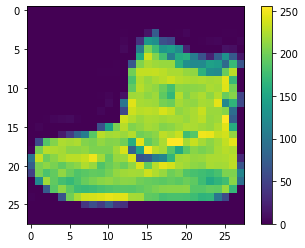

In [29]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

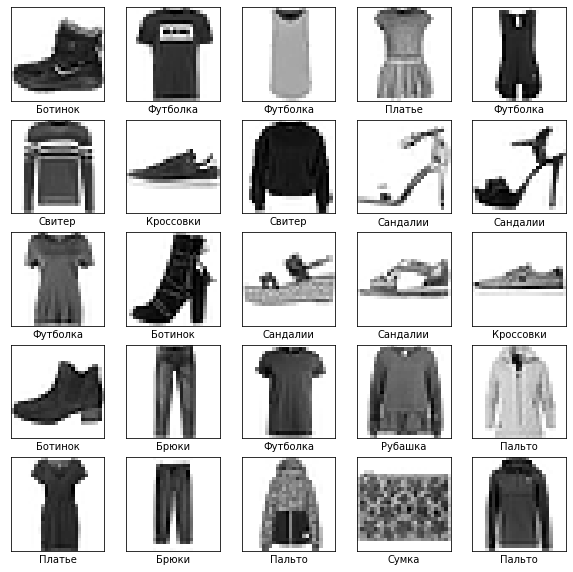

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.6336 - accuracy: 0.7811
Epoch 2/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.3858 - accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.3345 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 2s 842us/step - loss: 0.3191 - accuracy: 0.8824
Epoch 5/10
1875/1875 [==============================] - 2s 836us/step - loss: 0.2952 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.2861 - accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2718 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.2522 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 2s 838us/step - loss: 0.2436 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 2s 906u

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3597 - accuracy: 0.8777


In [43]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [49]:
img = test_images[1]
img = (np.expand_dims(img,0))
prediction = model.predict(img)
print(prediction)

[[ -1.4487797  -18.818848    11.889968   -15.268595     3.304424
  -32.49328      0.14710045 -35.866535   -13.6305485  -19.829165  ]]


In [51]:
np.argmax(prediction[0])

2